### Importing the data

In [1]:
# #Extracting the images
# import tarfile

# #file downloaded from http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar and saved as 'stanford_dogs_images.tar'

# #Extraction of folders of images
# my_tar = tarfile.open('stanford_dogs_images.tar')
# my_tar.extractall('./stanford_dogs_images') # specify which folder to extract to
# my_tar.close()


In [2]:
random_seed=1994

In [17]:
import os
import tensorflow as tf

from skimage import io
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns


In [4]:
N_Breeds=10
Batch_Size=20

In [5]:
fpath = "./stanford_dogs_images/Images/" #Place where all the folders of images are stored

breeds_folders = os.listdir(fpath) #names of the folders for each breed

#Selecting the number of breeds:
breeds_folders=breeds_folders[:N_Breeds]

#transforming to just the name of the breeds:
breeds=[]
for name in breeds_folders[:Batch_Size]:
    breeds+=[name[10:]]

print("Number of breeds: ",len(breeds))

Number of breeds:  10


In [6]:
#Checking the number of images of dogs per breed
imagesinside=0
imagesperbreed=[]
for i, breedfolder in enumerate(breeds_folders):
    for image in os.listdir(fpath+"/"+breedfolder):
        imagesinside+=1
    imagesperbreed+=[imagesinside]
    imagesinside=0

about_each_breed=pd.DataFrame(list(zip(breeds,imagesperbreed)),columns=["Breed","Number of Images"])
about_each_breed["original_order"]=about_each_breed.index+1 #Adding column to know the original order of the folders
about_each_breed.head()

,Breed,Number of Images,original_order
0,Chihuahua,152,1
1,Japanese_spaniel,185,2
2,Maltese_dog,252,3
3,Pekinese,149,4
4,Shih-Tzu,214,5


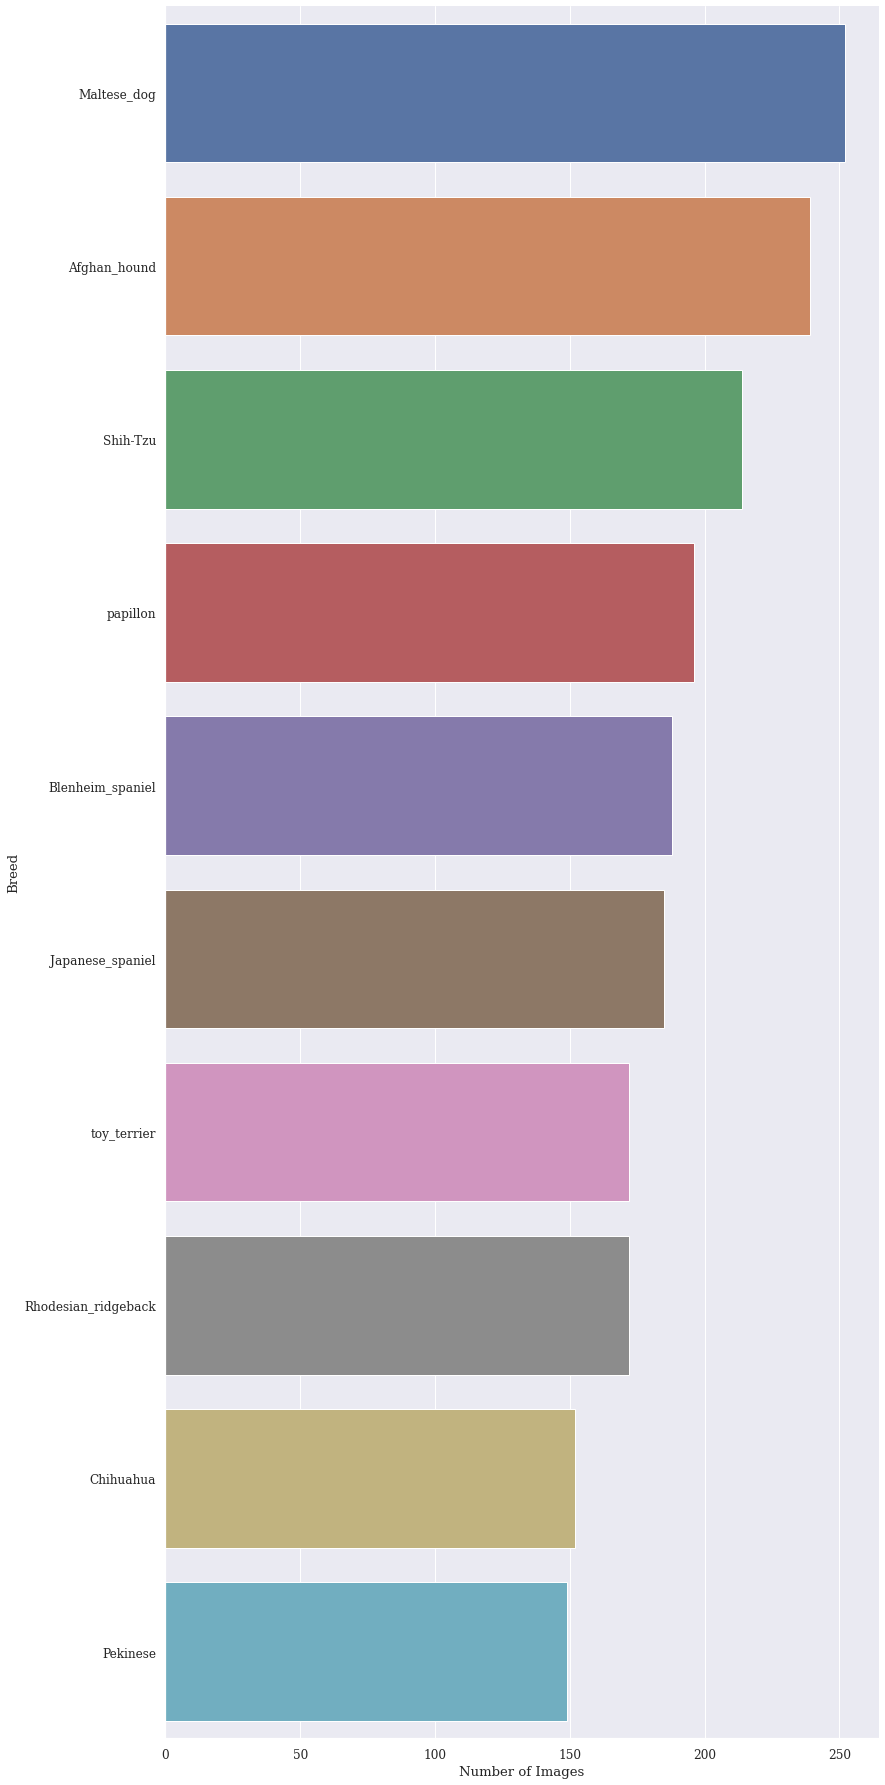

In [7]:
sns.set_theme(style="darkgrid",font_scale=1.1,font="serif")
sns.catplot(y="Breed", x="Number of Images",data=about_each_breed.sort_values(by=["Number of Images"],ascending=False),
            kind="bar",orient="h",height=25, aspect=0.5)

plt.show()

In [8]:
#This function performs the following actions:
#1 Reads every image from every folder of each breed
#2 Resizes the images
#3 Puts all the images and labels of each image in a numpy array

def LoadingImagesResizingAndLabels(breeds_folders,lenght,width):
    theimages=[]
    thelabels=[]
    for i, breedfolder in enumerate(breeds_folders): #names of the folders for each breed
        print(breedfolder,"...")
        for image_name in os.listdir(fpath+"/"+breedfolder): #names for each image inside the folders
            img = io.imread(fpath+"/"+breedfolder+"/"+image_name) #load image from file in RGB
            rezised=resize(img,(lenght,width)) #resizing image
            theimages.append(np.array(rezised)) #appending the images
            thelabels.append(i) #appending the labels
    imagesnp = np.array(theimages) #transforming list of images to numpy array
    labelsnp = np.array(thelabels) #transforming list of images to numpy array

    print("Number of Images:",len(imagesnp))
    print("Number of Breeds:",len(breeds_folders))
    print("Size of each image:",lenght,",",width)
    return imagesnp, labelsnp

In [9]:
#Loading the images, resizing them, and loading the labels:
lenght=224
width=224
images, labels = LoadingImagesResizingAndLabels(breeds_folders,lenght,width)

n02085620-Chihuahua ...
n02085782-Japanese_spaniel ...
n02085936-Maltese_dog ...
n02086079-Pekinese ...
n02086240-Shih-Tzu ...
n02086646-Blenheim_spaniel ...
n02086910-papillon ...
n02087046-toy_terrier ...
n02087394-Rhodesian_ridgeback ...
n02088094-Afghan_hound ...
Number of Images: 1919
Number of Breeds: 10
Size of each image: 224 , 224


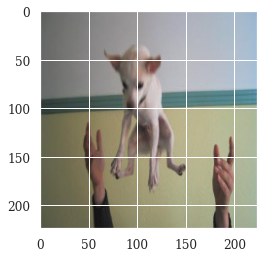

In [10]:
plt.imshow(images[2])
plt.show()

In [11]:
#Creating a binary class matrix with the breed types:
label_output_matrix = utils.to_categorical(labels, num_classes = N_Breeds)

In [12]:
# Dividing data into training and testing (stratified)
X_train, X_test, y_train, y_test = train_test_split(images, label_output_matrix, test_size=0.2, random_state=random_seed,stratify=label_output_matrix)

#For data augmentation, we also need validation set:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_seed,stratify=y_train)

# from keras.utils import np_utils
print("For training without data augmentation:")
print("x_train shape = ",X_train.shape)
print("y_train shape = ",y_train.shape)

print("\nFor training with data augmentation:")
print("x_train2 shape = ",X_train2.shape)
print("y_train2 shape = ",y_train2.shape)
print("\nx_val shape = ",X_val.shape)
print("y_val shape = ",y_val.shape)

print("\nFor both cases:")
print("\nx_test shape = ",X_test.shape)
print("y_test shape = ",y_test.shape)


For training without data augmentation:
x_train shape =  (1535, 224, 224, 3)
y_train shape =  (1535, 10)

For training with data augmentation:
x_train2 shape =  (1228, 224, 224, 3)
y_train2 shape =  (1228, 10)

x_val shape =  (307, 224, 224, 3)
y_val shape =  (307, 10)

For both cases:

x_test shape =  (384, 224, 224, 3)
y_test shape =  (384, 10)


In [13]:
# #LeNet
# model = Sequential()
# # CONV => RELU => POOL
# model.add(Conv2D(20, kernel_size=5, padding="same", input_shape=(lenght,width,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# # CONV => RELU => POOL
# model.add(Conv2D(50, kernel_size=5, padding="same"))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# # Flatten => RELU layers
# model.add(Flatten())
# model.add(Dense(500))
# model.add(Activation("relu"))

# # a softmax classifier
# model.add(Dense(N_Breeds))
# model.add(Activation("softmax"))

In [18]:
#l=224, w=224
#AlexNet2012
model = Sequential()
#1 CONV => RELU => POOL => NORMALIZATION
model.add(Conv2D(96, kernel_size=11, padding="valid",strides=(4,4), input_shape=(lenght,width,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

#2 CONV => RELU => POOL => NORMALIZATION
model.add(Conv2D(256, kernel_size=5, strides=(1,1), padding="valid"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

#3,4,5 CONV => RELU => NORMALIZATION
model.add(Conv2D(384, kernel_size=3, strides=(1,1), padding="valid"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(384, kernel_size=3, strides=(1,1), padding="valid"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=3, strides=(1,1), padding="valid"))
model.add(Activation("relu"))

# POOL => NORMALIZATION
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(BatchNormalization())

# Flatten => RELU layers => Dropout => Normalization
model.add(Flatten())
model.add(Dense(4096))
model.add(Activation("relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())


# Flatten => RELU layers => Dropout => Normalization
model.add(Dense(4096))
model.add(Activation("relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())


# a softmax classifier
model.add(Dense(N_Breeds))
model.add(Activation("softmax"))

In [19]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 activation_7 (Activation)   (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 25, 25, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 256)       614656    
                                                                 
 activation_8 (Activation)   (None, 21, 21, 256)      

### Without data Augmentation

In [ ]:
history = model.fit(X_train, y_train, batch_size=Batch_Size, epochs=10, verbose=1, validation_split=0.2)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn import metrics
label_pred = model.predict(X_test)
pred = []

for i in range(len(label_pred)):
    pred.append(np.argmax(label_pred[i]))

Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index


print(metrics.classification_report(Y_test, pred))

### With data augmentation

In [ ]:
# From https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/
# To try to see the data generator effects
# example:
from numpy import expand_dims

from keras.preprocessing.image import ImageDataGenerator

data = images[1]

#expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-20,20],height_shift_range=0.20,
							horizontal_flip=True,rotation_range=45,zoom_range=[0.85,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(3):
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0]
	# plot raw pixel data
	plt.imshow(image)
	# show the figure
	plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-10,10],height_shift_range=0.10,
							horizontal_flip=True,rotation_range=10,zoom_range=[0.95,1.0])

# create the iterator
it = datagen.flow(X_train2,y_train2)

# step_per_epoch=int(len(X_train)/Batch_Size) #Num of batches of samples comprising one epoch
step_per_epoch=19

In [ ]:
history = model.fit(it,steps_per_epoch=step_per_epoch, batch_size=Batch_Size, epochs=10, verbose=1,validation_data=(X_val, y_val))

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn import metrics
label_pred = model.predict(X_test)
pred = []

for i in range(len(label_pred)):
    pred.append(np.argmax(label_pred[i]))

Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index


print(metrics.classification_report(Y_test, pred))